# Ensemble Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [3]:
def show_corr(features, target):
    features.corrwith(target).plot.bar(color="orange", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    sns.heatmap(
        corr,
        annot=True,
        cmap=COLOR_MAP,
        fmt=".2f",
        vmax=100,
        vmin=-100,
    )
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, y):
    for col in x.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figwidth(12)
        fig.suptitle("X: {i}".format(i=col), fontdict={"color": "darkblue"})
        ax1.scatter(x[col], y, color="red", s=DOT_SIZE,)
        ax1.spines["bottom"].set_color(T_COLOR)
        ax1.spines["top"].set_color(None)
        ax1.spines["left"].set_color(T_COLOR)
        ax1.spines["right"].set_color(None)
        ax1.tick_params(axis="x", colors=T_COLOR)
        ax1.tick_params(axis="y", colors=T_COLOR)
        ax2.hist(x[col], color="orange")
        ax2.spines["bottom"].set_color(T_COLOR)
        ax2.spines["top"].set_color(None)
        ax2.spines["left"].set_color(T_COLOR)
        ax2.spines["right"].set_color(None)
        ax2.tick_params(axis="x", colors=T_COLOR)
        ax2.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="orange", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1"),
        vmax=100,
        vmin=0,
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

## Quality  Check Dataset

In [4]:
dataset = pd.read_csv("../data/QC.csv")

### EDA

In [5]:
dataset[:TOP_K]

,Voltage,Defect
0,1.10,0
1,1.90,0
2,2.00,0
3,2.30,0
4,2.91,0


In [6]:
dataset.describe()

,Voltage,Defect
count,52.000000,52.000000
mean,5.702308,0.403846
std,2.465469,0.495454
min,1.100000,0.000000
25%,3.600000,0.000000
50%,5.375000,0.000000
75%,7.227500,1.000000
max,12.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  52 non-null     float64
 1   Defect   52 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 964.0 bytes


In [8]:
X_df = dataset.drop(columns=["Defect"], axis=1)
y_df = dataset["Defect"]
X = np.array(X_df)
y = np.array(y_df)

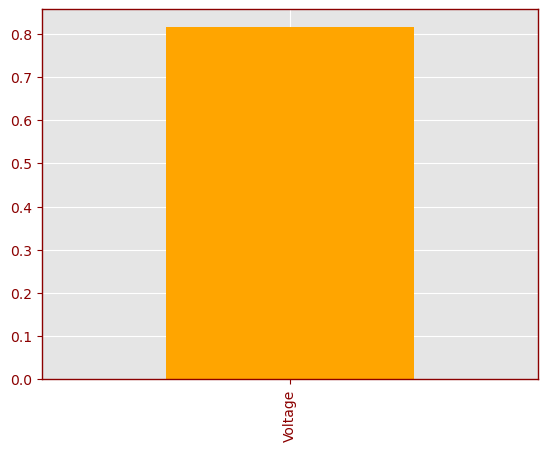

In [9]:
show_corr(X_df, y_df)

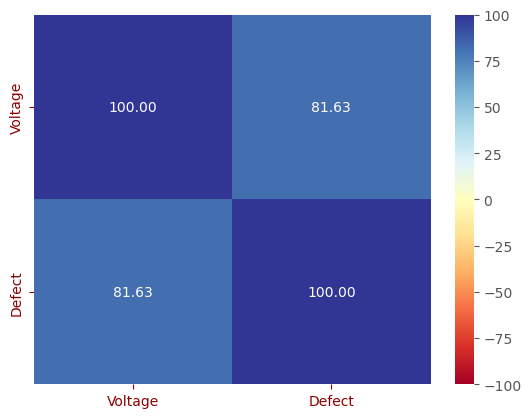

In [10]:
show_corr_heatmap(dataset)

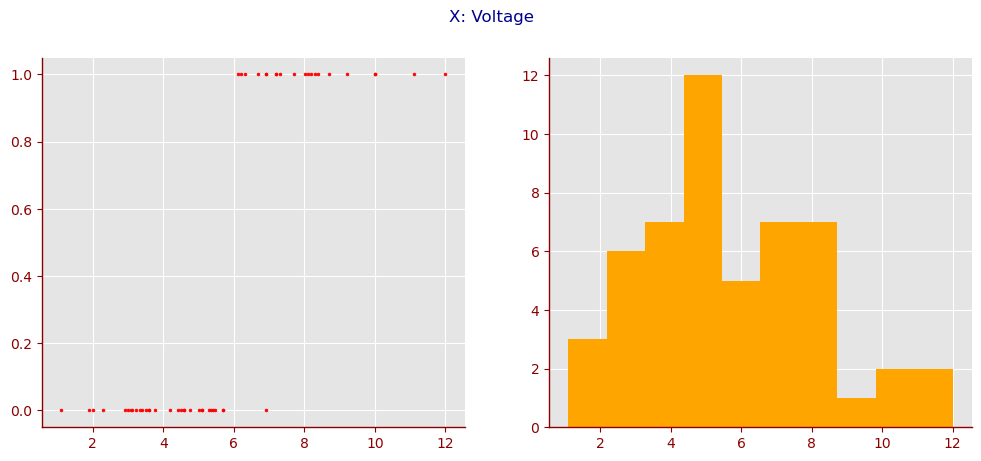

In [11]:
plot_features(X_df, y_df)

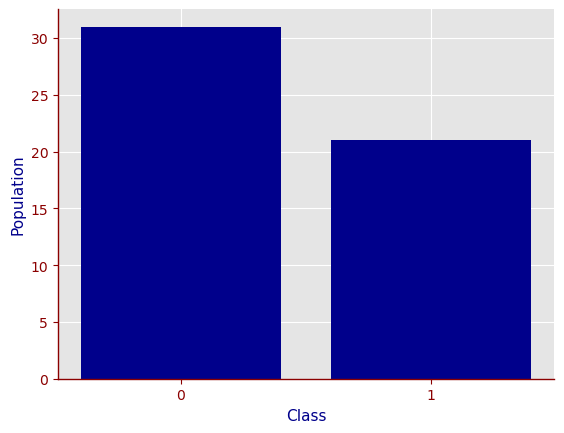

In [12]:
plot_class_dist(y_df)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

In [14]:
X_gradient = (np.arange((X_train.max() - X_train.min())*1000)*0.001 + X_train.min()).reshape(-1, 1)

### Random Forest Classifier

In [15]:
model_RFC = RandomForestClassifier(
    n_estimators=150,
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.1s finished


In [16]:
y_pred_RFC = model_RFC.predict(X_test)
y_prob_RFC = model_RFC.predict_proba(X_test) * 100
model_RFC.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


1.0

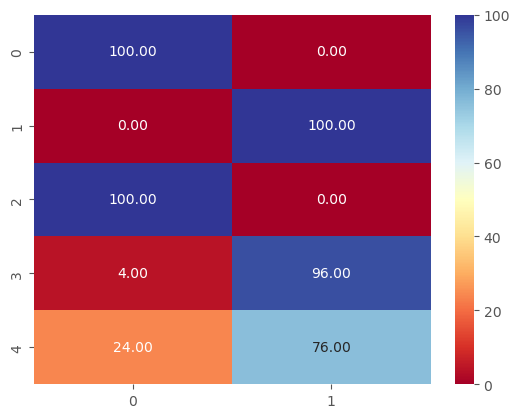

In [17]:
sns.heatmap(y_prob_RFC[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

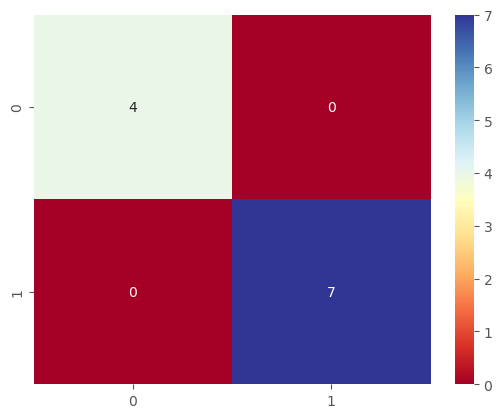

In [18]:
cm_RFC = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_RFC)
sns.heatmap(cm_RFC, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

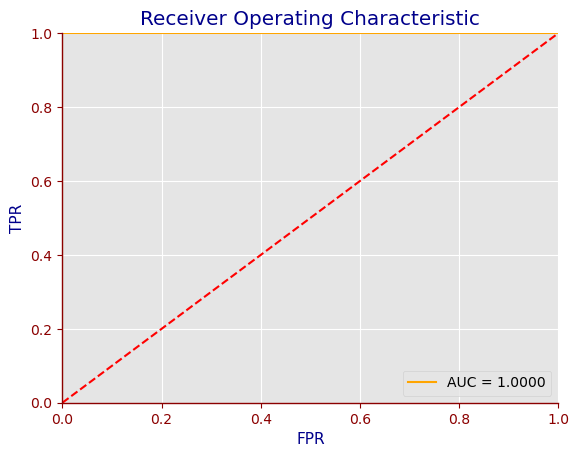

In [19]:
fpr_RFC, tpr_RFC, _ = metrics.roc_curve(y_test, y_prob_RFC[:, 1])
roc_auc_RFC = metrics.auc(fpr_RFC, tpr_RFC)
plot_roc(fpr_RFC, tpr_RFC, roc_auc_RFC)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


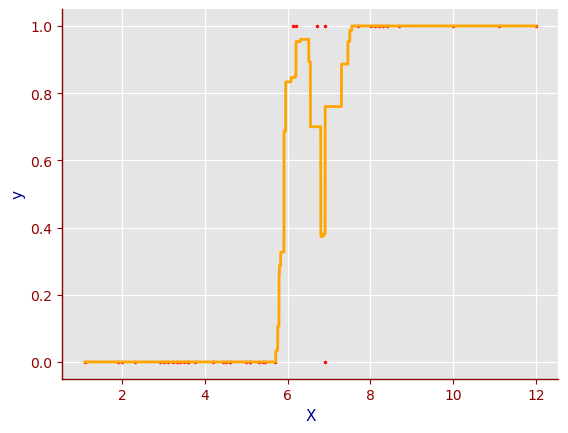

In [20]:
y_curve_RFC = model_RFC.predict_proba(X_gradient)
plot_Xy2(
    X_train,
    y_train,
    X_gradient.reshape(-1,),
    y_curve_RFC[:, 1],
)

### XGB Random Forest Classifier

In [21]:
param_grid_XGBRFC = {
}

model_XGBRFC = XGBRFClassifier(
    n_estimators=150,
    n_jobs=N_JOBS,
    verbosity=VERBOSE,
)

grid_search_cv_XGBRFC = GridSearchCV(
    model_XGBRFC,
    param_grid=param_grid_XGBRFC,
    refit=True,
)

pipeline_XGBRFC = make_pipeline(
    grid_search_cv_XGBRFC,
)

pipeline_XGBRFC.fit(X_train, y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=XGBRFClassifier(base_score=None,
                                                        booster=None,
                                                        callbacks=None,
                                                        colsample_bylevel=None,
                                                        colsample_bytree=None,
                                                        device=None,
                                                        early_stopping_rounds=None,
                                                        enable_categorical=False,
                                                        eval_metric=None,
                                                        feature_types=None,
                                                        gamma=None,
                                                        grow_policy=None,
                                                        importance_type=None,
                                                        interaction_constraints=None,
                                                        max_bin=None,
                                                        max_cat_threshold=None,
                                                        max_cat_to_onehot=None,
                                                        max_delta_step=None,
                                                        max_depth=None,
                                                        max_leaves=None,
                                                        min_child_weight=None,
                                                        missing=nan,
                                                        monotone_constraints=None,
                                                        multi_strategy=None,
                                                        n_estimators=150,
                                                        n_jobs=4,
                                                        num_parallel_tree=None,
                                                        objective='binary:logistic',
                                                        random_state=None,
                                                        reg_alpha=None, ...),
                              param_grid={}))])

In [22]:
y_pred_XGBRFC = pipeline_XGBRFC.predict(X_test)
y_prob_XGBRFC = pipeline_XGBRFC.predict_proba(X_test) * 100
pipeline_XGBRFC.score(X_test, y_test)

1.0

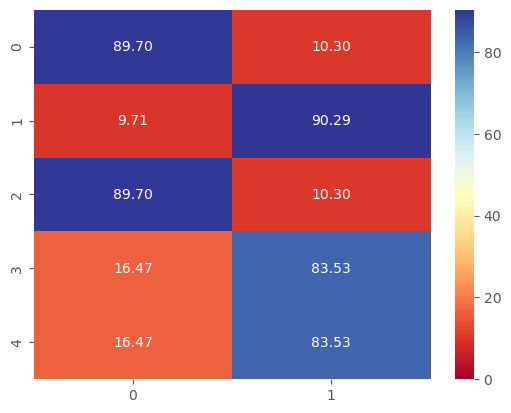

In [23]:
sns.heatmap(y_prob_XGBRFC[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

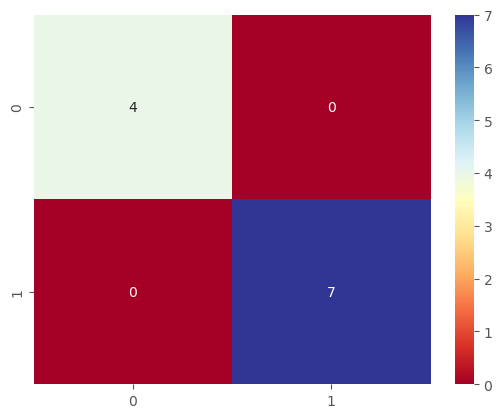

In [24]:
cm_XGBRFC = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_XGBRFC)
sns.heatmap(cm_XGBRFC, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

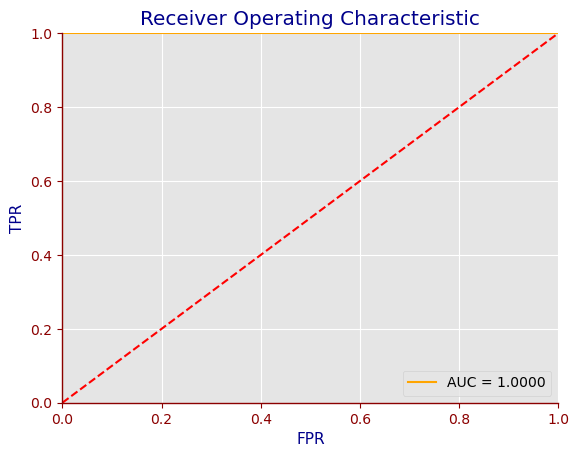

In [25]:
fpr_XGBRFC, tpr_XGBRFC, _ = metrics.roc_curve(y_test, y_prob_XGBRFC[:, 1])
roc_auc_XGBRFC = metrics.auc(fpr_XGBRFC, tpr_XGBRFC)
plot_roc(fpr_XGBRFC, tpr_XGBRFC, roc_auc_XGBRFC)

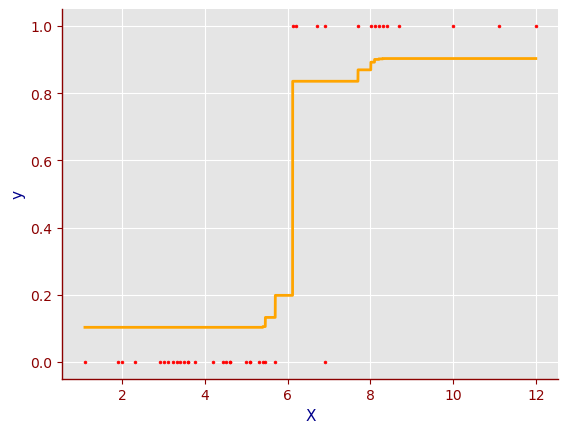

In [26]:
y_curve_XGBRFC = pipeline_XGBRFC.predict_proba(X_gradient)
plot_Xy2(
    X_train,
    y_train,
    X_gradient.reshape(-1,),
    y_curve_XGBRFC[:, 1],
)

### Gradient Boosting Classifier

In [27]:
model_GBC = GradientBoostingClassifier(
    n_estimators=150,
    random_state=N_SEED,
    verbose=VERBOSE,
).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0941            0.16s
         2           0.9450            0.16s
         3           0.8236            0.12s
         4           0.7224            0.10s
         5           0.6368            0.08s
         6           0.5634            0.08s
         7           0.5001            0.07s
         8           0.4450            0.07s
         9           0.3968            0.06s
        10           0.3544            0.06s
        20           0.1215            0.04s
        30           0.0437            0.03s
        40           0.0159            0.03s
        50           0.0058            0.02s
        60           0.0021            0.02s
        70           0.0008            0.02s
        80           0.0003            0.02s
        90           0.0001            0.01s
       100           0.0000            0.01s


In [28]:
y_pred_GBC = model_GBC.predict(X_test)
y_prob_GBC = model_GBC.predict_proba(X_test) * 100
model_GBC.score(X_test, y_test)

1.0

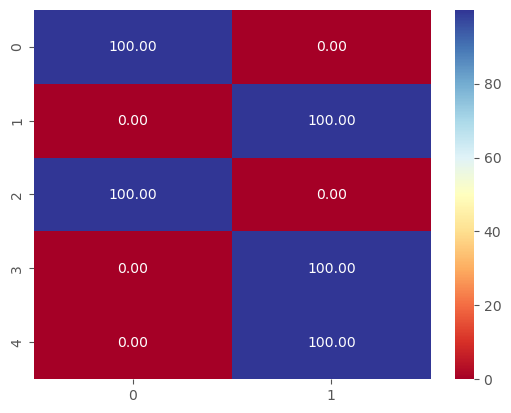

In [29]:
sns.heatmap(y_prob_GBC[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

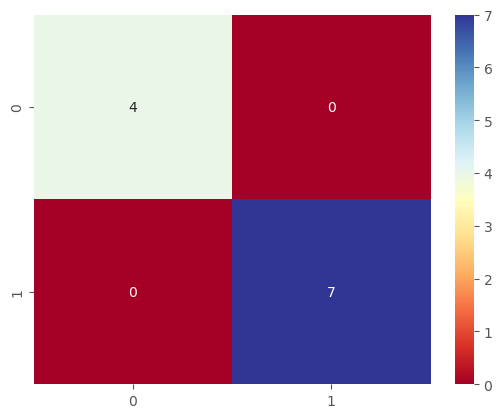

In [30]:
cm_GBC = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_GBC)
sns.heatmap(cm_GBC, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

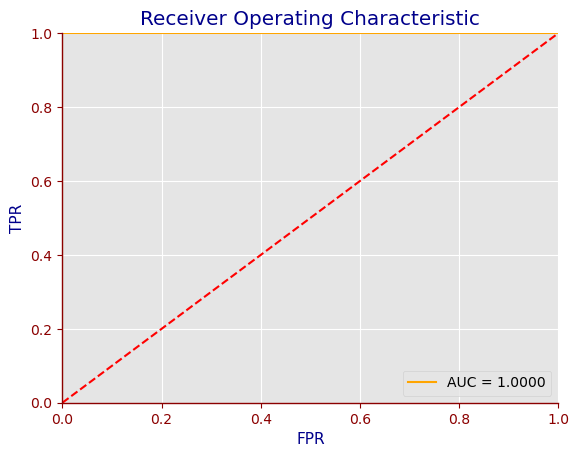

In [31]:
fpr_GBC, tpr_GBC, _ = metrics.roc_curve(y_test, y_prob_GBC[:, 1])
roc_auc_GBC = metrics.auc(fpr_GBC, tpr_GBC)
plot_roc(fpr_GBC, tpr_GBC, roc_auc_GBC)

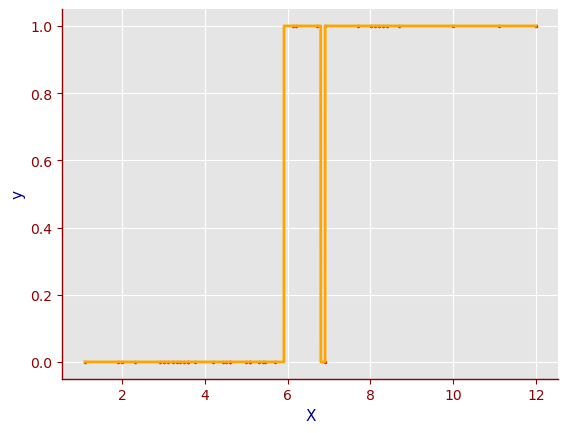

In [32]:
y_curve_GBC = model_GBC.predict_proba(X_gradient)
plot_Xy2(
    X_train,
    y_train,
    X_gradient.reshape(-1,),
    y_curve_GBC[:, 1],
)

In [33]:
param_grid_XGBC = {
}

model_XGBC = XGBClassifier(
    n_estimators=150,
    n_jobs=N_JOBS,
    verbosity=VERBOSE,
)

grid_search_cv_XGBC = GridSearchCV(
    model_XGBC,
    param_grid=param_grid_XGBC,
    refit=True,
)

pipeline_XGBC = make_pipeline(
    grid_search_cv_XGBC,
)

pipeline_XGBC.fit(X_train, y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=150,
                                                      n_jobs=4,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={}))])

In [34]:
y_pred_XGBC = pipeline_XGBC.predict(X_test)
y_prob_XGBC = pipeline_XGBC.predict_proba(X_test) * 100
pipeline_XGBC.score(X_test, y_test)

1.0

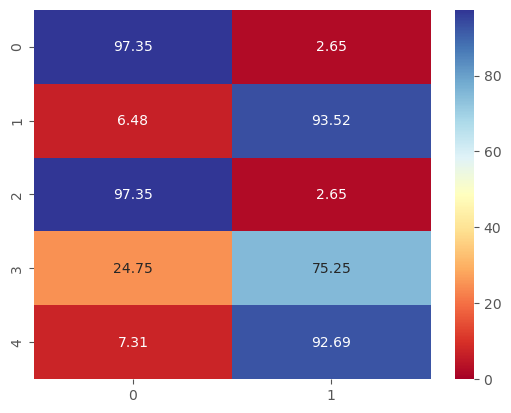

In [35]:
sns.heatmap(y_prob_XGBC[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

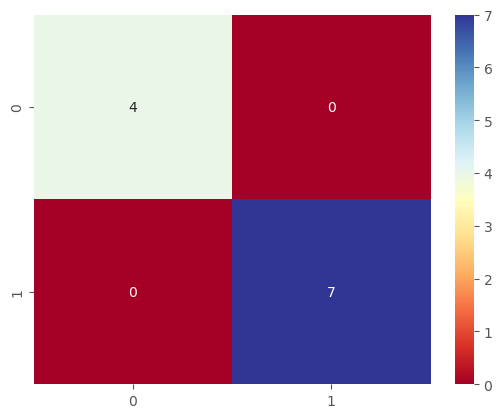

In [36]:
cm_XGB = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_XGBC)
sns.heatmap(cm_XGB, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

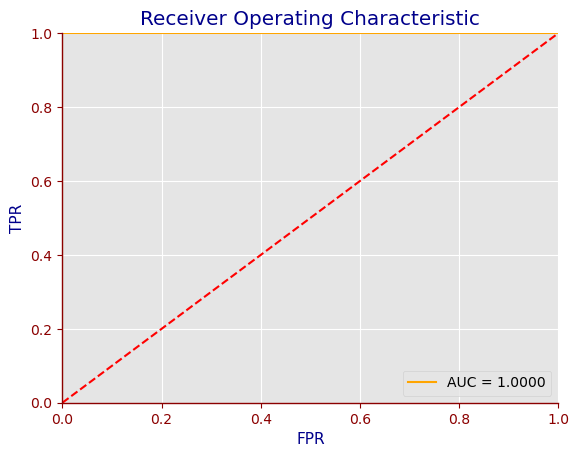

In [37]:
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test, y_prob_XGBC[:, 1])
roc_auc_XGB = metrics.auc(fpr_XGB, tpr_XGB)
plot_roc(fpr_XGB, tpr_XGB, roc_auc_XGB)

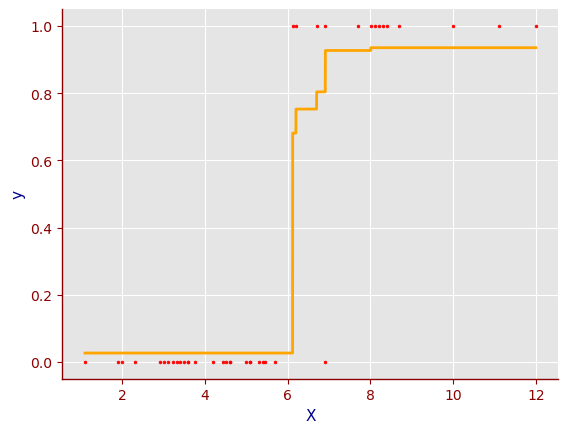

In [38]:
y_curve_XGBC = pipeline_XGBC.predict_proba(X_gradient)
plot_Xy2(
    X_train,
    y_train,
    X_gradient.reshape(-1,),
    y_curve_XGBC[:, 1],
)

### Artificial Neuron Network Classification with TensorFlow

In [39]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler_NN = MinMaxScaler()  
X_ANN = scaler_NN.fit_transform(X)
y_ANN = y.reshape(-1, 1)

In [41]:
X_train_ANN, X_test_ANN, y_train_ANN, y_test_ANN = train_test_split(
    X_ANN,
    y_ANN,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

In [42]:
BATCH_SIZE = 30
NO_EPOCHS = 1500
HIDDEN_SIZE1 = 3

input_layer = tf.keras.layers.Input(shape=(1,))
output_layer =  tf.keras.layers.Dense(units=1, activation="sigmoid")

layers_ANN = [
    input_layer,
    tf.keras.layers.Dense(
        units=HIDDEN_SIZE1,
        activation="relu",
    ),
    output_layer,
]

model_ANN = tf.keras.models.Sequential(layers_ANN)

In [43]:
optimizer_ANN = tf.optimizers.SGD(
        learning_rate=0.1,
)

model_ANN.compile(
    optimizer=optimizer_ANN,
    loss=tf.keras.losses.BinaryCrossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy,
    ],
)

model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=20,
    verbose=VERBOSE,
)

callbacks = [early_stopping]

In [45]:
model_ANN.fit(
    X_train_ANN,
    y_train_ANN,
    batch_size=BATCH_SIZE,
    epochs=NO_EPOCHS,
    verbose=VERBOSE,
    # callbacks=callbacks,
)

Epoch 1/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6724 - loss: 0.7113  
Epoch 2/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6279 - loss: 0.7173 
Epoch 3/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6390 - loss: 0.7106 
Epoch 4/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6501 - loss: 0.7017 
Epoch 5/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6501 - loss: 0.6975 
Epoch 6/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6612 - loss: 0.6913 
Epoch 7/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6612 - loss: 0.6896 
Epoch 8/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6501 - loss: 0.6907 
Epoch 9/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6724 - loss: 0.6793 
Epoch 10/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6501 - loss: 0.6870 
Epoch 11/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6612 -

In [46]:
y_proba_one_ANN = model_ANN.predict(X_test_ANN)
y_pred_ANN = y_proba_one_ANN.round()
metrics.accuracy_score(y_true=y_test_ANN, y_pred=y_pred_ANN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


1.0

In [47]:
y_proba_zero_ANN = np.ones(len(y_proba_one_ANN)).reshape(-1, 1) - y_proba_one_ANN
y_proba_ANN = (np.concatenate((y_proba_zero_ANN, y_proba_one_ANN), 1))*100

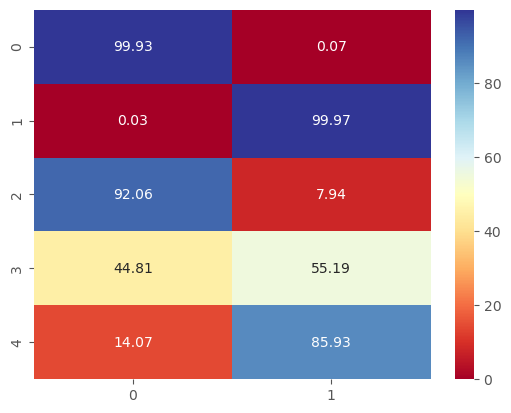

In [48]:
sns.heatmap(y_proba_ANN[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

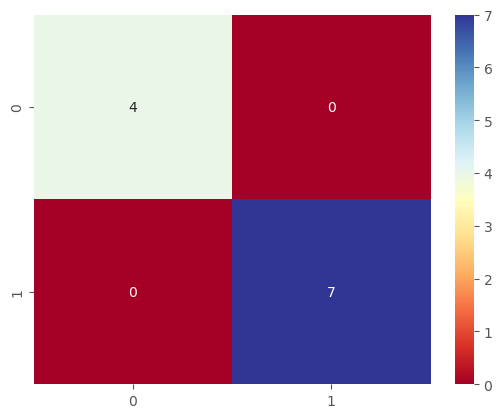

In [49]:
cm_ANN = metrics.confusion_matrix(y_true=y_test_ANN, y_pred=y_pred_ANN)
sns.heatmap(cm_ANN, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

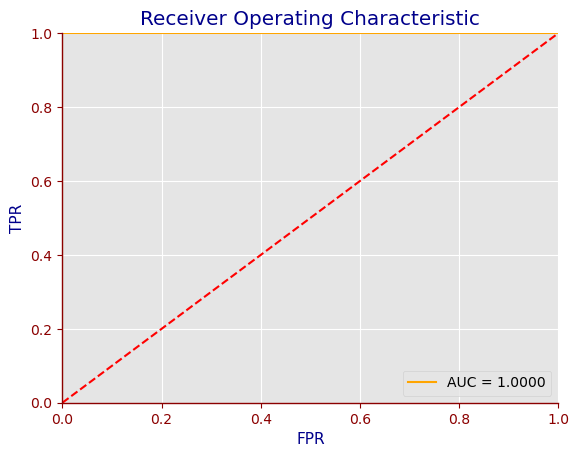

In [50]:
fpr_ANN, tpr_ANN, _ = metrics.roc_curve(y_test_ANN, y_proba_ANN[:, 1])
roc_auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)
plot_roc(fpr_ANN, tpr_ANN, roc_auc_ANN)

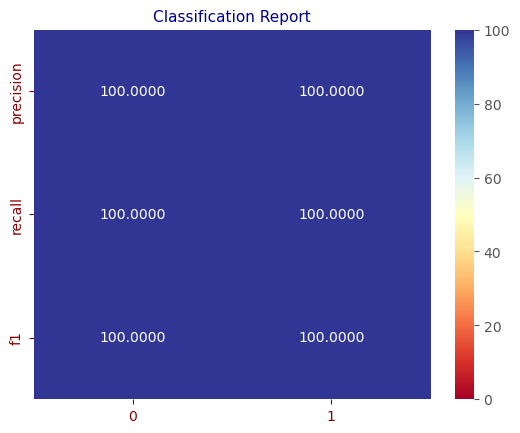

In [51]:
plot_classification(y_true=y_test_ANN, y_pred=y_pred_ANN)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step


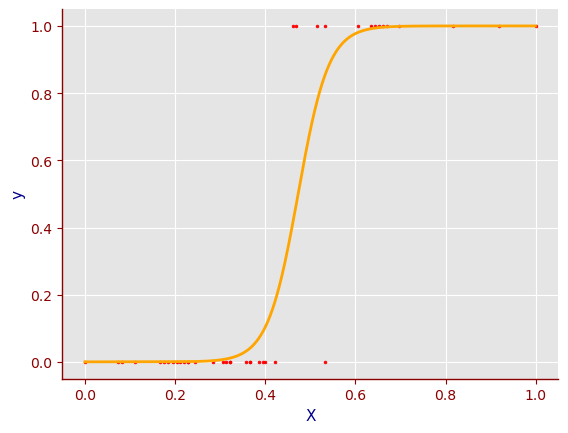

In [52]:
X_gradient_ANN = (np.arange(1000)*0.001).reshape(-1, 1)
y_curve_ANN =  model_ANN.predict(X_gradient_ANN)
plot_Xy2(
    X_train_ANN,
    y_train_ANN,
    X_gradient_ANN.reshape(-1,),
    y_curve_ANN,
)

## Iris dataset (classification problem)

In [53]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

In [54]:
pd.DataFrame(X1)
pd.DataFrame(y1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### EDA

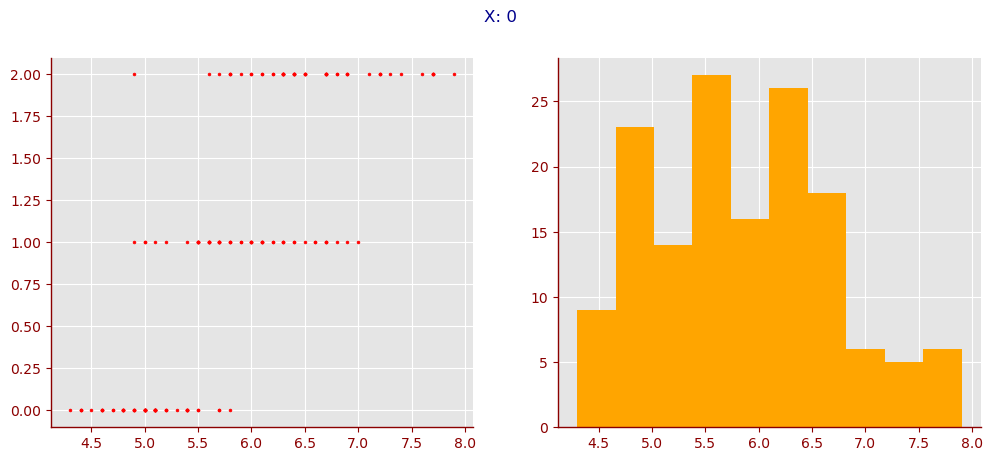

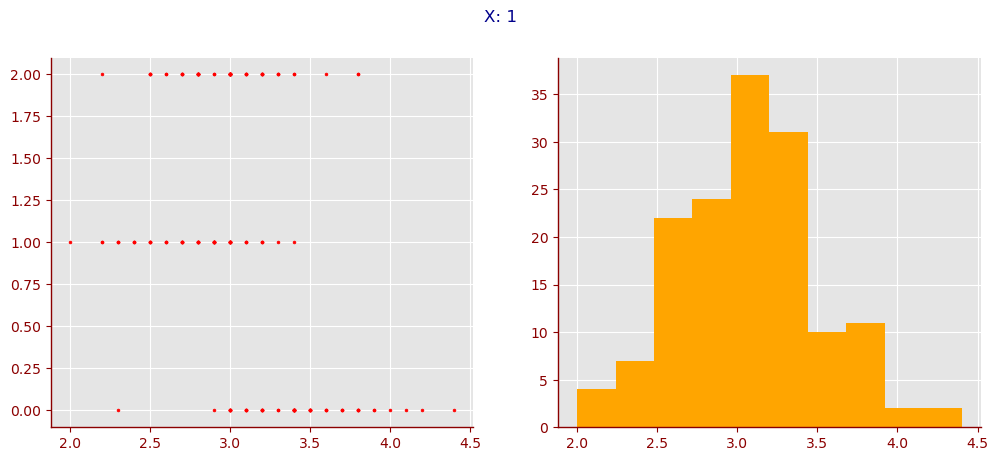

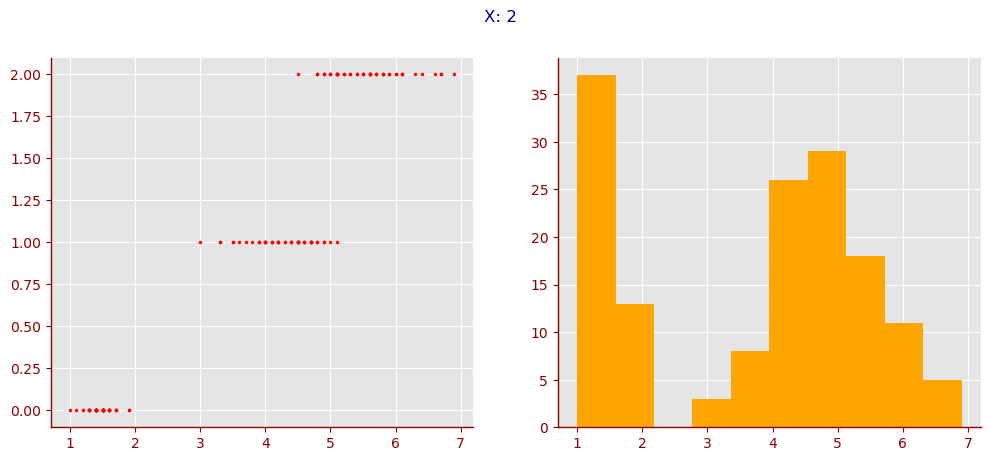

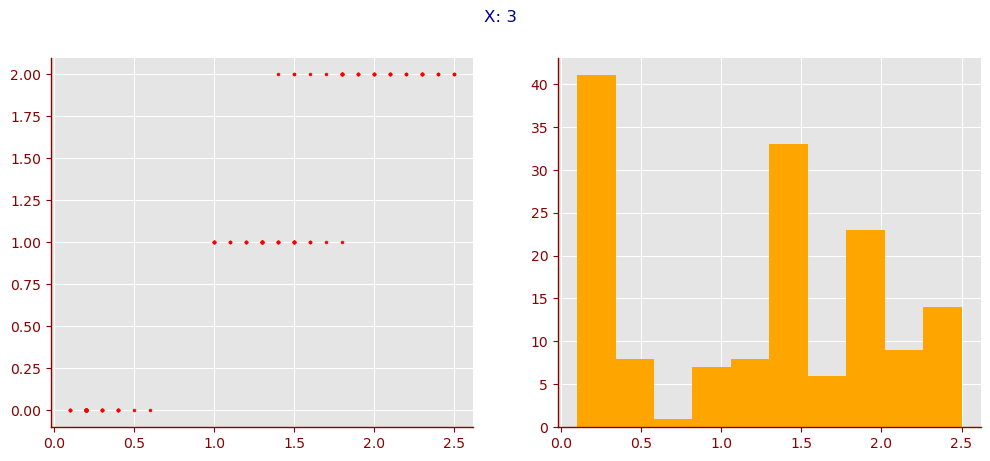

In [55]:
plot_features(pd.DataFrame(X1), y1)

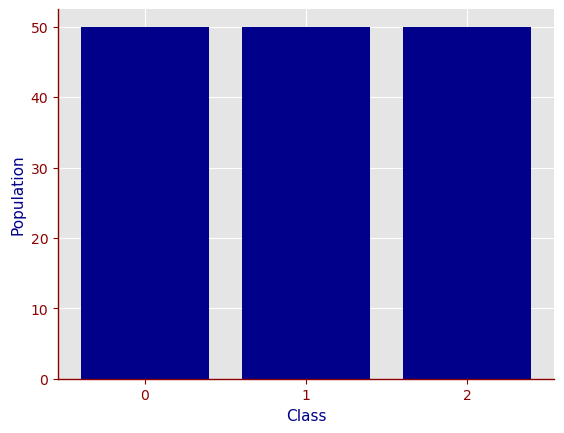

In [56]:
plot_class_dist(y1)

### Create a model and fit data into the model

In [57]:
model1_RFC = RandomForestClassifier(
    n_estimators=150,
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.1s finished


In [58]:
model1_GBC = GradientBoostingClassifier(
    n_estimators=150,
    random_state=N_SEED,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

      Iter       Train Loss   Remaining Time 
         1           0.9164            0.35s
         2           0.7751            0.32s
         3           0.6616            0.25s
         4           0.5687            0.22s
         5           0.4917            0.20s
         6           0.4267            0.18s
         7           0.3718            0.17s
         8           0.3255            0.16s
         9           0.2854            0.16s
        10           0.2511            0.15s
        20           0.0779            0.12s
        30           0.0292            0.11s
        40           0.0128            0.10s
        50           0.0060            0.09s
        60           0.0031            0.08s
        70           0.0017            0.07s
        80           0.0008            0.06s
        90           0.0004            0.05s
       100           0.0002            0.04s


### Predict

In [59]:
y1_pred_RFC = model1_RFC.predict(X1_test)
y1_proba_RFC = model1_RFC.predict_proba(X1_test) * 100

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


In [60]:
y1_pred_GBC = model1_GBC.predict(X1_test)
y1_proba_GBC = model1_GBC.predict_proba(X1_test) * 100

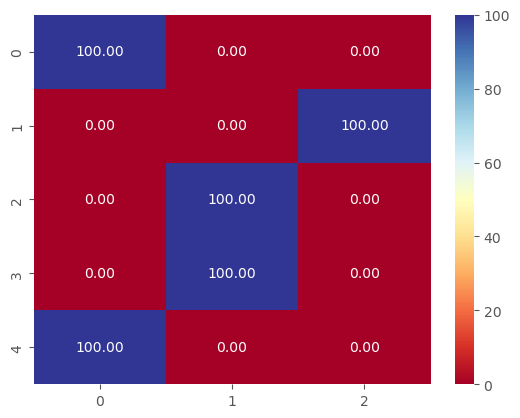

In [61]:
sns.heatmap(y1_proba_RFC[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

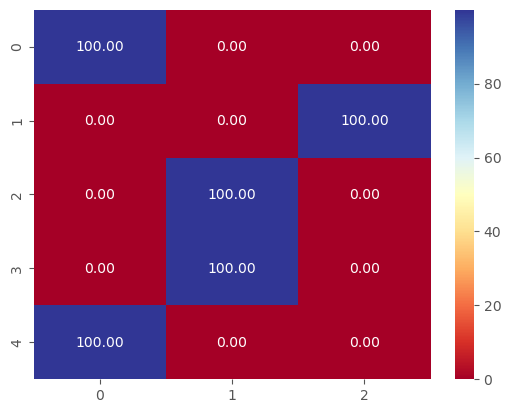

In [62]:
sns.heatmap(y1_proba_GBC[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

### Confusion Matrix

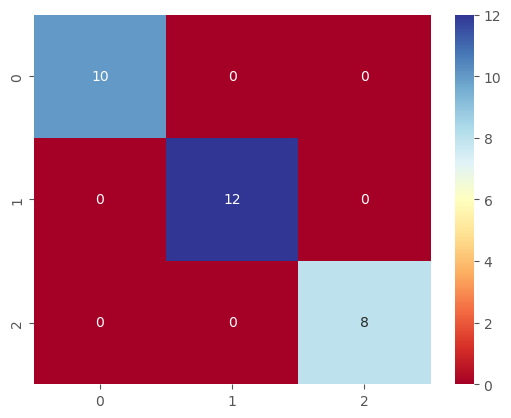

In [63]:
cm1_RFC = metrics.confusion_matrix(y_true=y1_test, y_pred=y1_pred_RFC)
sns.heatmap(cm1_RFC, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

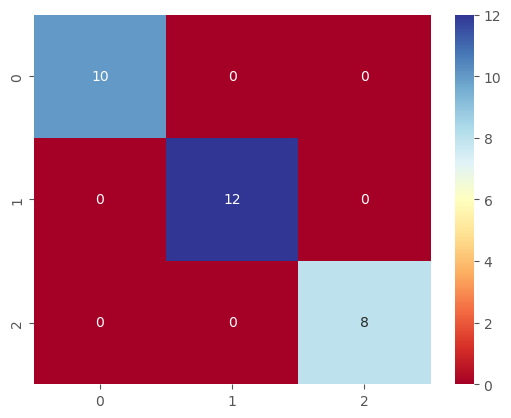

In [64]:
cm1_GBC = metrics.confusion_matrix(y_true=y1_test, y_pred=y1_pred_GBC)
sns.heatmap(cm1_GBC, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

### Classification Report

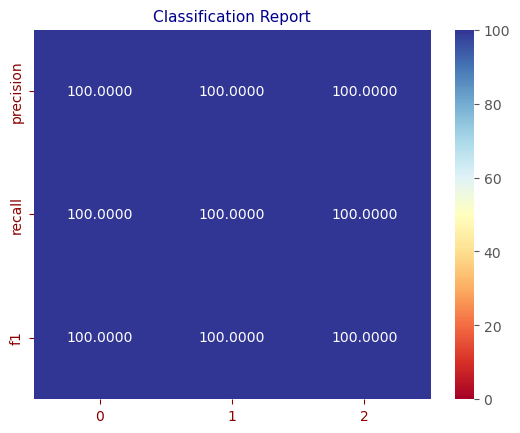

In [65]:
plot_classification(y1_test, y1_pred_RFC)

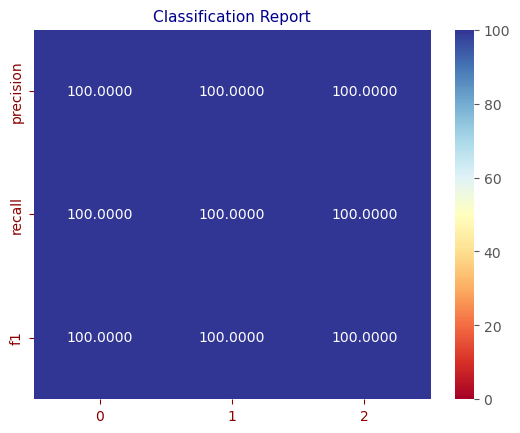

In [66]:
plot_classification(y1_test, y1_pred_GBC)